### Builds from scratch and Model selection

In [1]:
import pandas as pd
import numpy as  np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display='diagram')

##### Data Visualization and Feature Engineering

In [2]:
house=pd.read_csv('housing.csv')
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
house.shape

(20640, 10)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

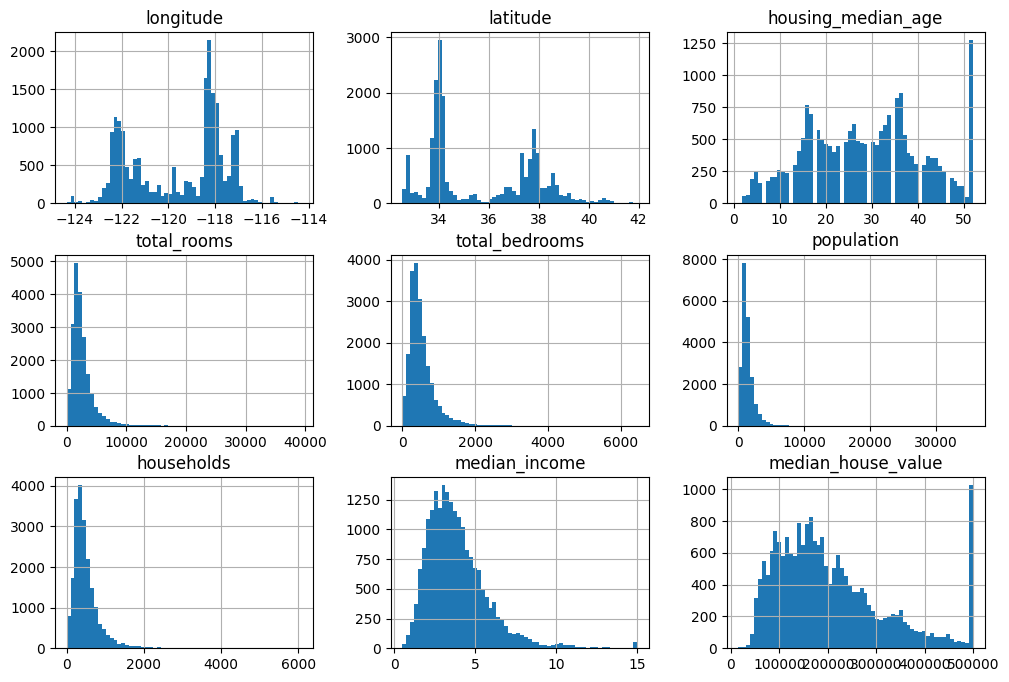

In [6]:
house.hist(bins=60,figsize=(12,8))

In [7]:
house_NUM=house.select_dtypes(include=np.number)
house_CAT=house.select_dtypes(include=object)

In [8]:
house_NUM.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [9]:
house_CAT.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


##### feature engineering

In [10]:
coMx=house_NUM.corr()
coMx['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [11]:
house["rooms_per_house"]  = house["total_rooms"] / house["households"]
house["bedrooms_ratio"]   = house["total_bedrooms"] / house["total_rooms"]
house["people_per_house"] = house["population"] / house["households"]

#### splitting data (feature & labels)

In [12]:
house_labels=house['median_house_value']
house_features=house.drop('median_house_value',axis=1)

#### splitting data into train and test 

In [13]:
x_train,x_test,y_train,y_test=train_test_split(house_features,house_labels,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)

(15480, 12)
(5160, 12)


In [14]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
8158,-120.95,37.59,43.0,1561.0,354.0,862.0,332.0,1.8466,INLAND,4.701807,0.226778,2.596386
18368,-115.55,32.98,33.0,2266.0,365.0,952.0,360.0,5.4349,INLAND,6.294444,0.161077,2.644444
19197,-117.85,33.80,40.0,1461.0,286.0,1322.0,264.0,4.3269,<1H OCEAN,5.534091,0.195756,5.007576
3746,-118.35,33.91,26.0,2159.0,523.0,1331.0,520.0,3.8700,<1H OCEAN,4.151923,0.242242,2.559615
13073,-117.38,33.98,52.0,2274.0,571.0,1167.0,504.0,2.0284,INLAND,4.511905,0.251099,2.315476


In [15]:
num_pipline=make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
cat_pipline=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder())


In [16]:
num_attribs = ["longitude",'latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','rooms_per_house','bedrooms_ratio','people_per_house']

cat_attribs = ["ocean_proximity"]

In [17]:
preprocessing=ColumnTransformer([('numerical',num_pipline,num_attribs),('categorical',cat_pipline,cat_attribs)])
preprocessing

,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [18]:
x_train_prepared=preprocessing.fit_transform(x_train)
x_test_prepared=preprocessing.transform(x_test)

In [19]:
feature_names = preprocessing.get_feature_names_out()
feature_names

array(['numerical__longitude', 'numerical__latitude',
       'numerical__housing_median_age', 'numerical__total_rooms',
       'numerical__total_bedrooms', 'numerical__population',
       'numerical__households', 'numerical__median_income',
       'numerical__rooms_per_house', 'numerical__bedrooms_ratio',
       'numerical__people_per_house',
       'categorical__ocean_proximity_<1H OCEAN',
       'categorical__ocean_proximity_INLAND',
       'categorical__ocean_proximity_ISLAND',
       'categorical__ocean_proximity_NEAR BAY',
       'categorical__ocean_proximity_NEAR OCEAN'], dtype=object)

In [20]:
X_train_prepared_df = pd.DataFrame(x_train_prepared, columns=feature_names)
X_train_prepared_df.head()

,numerical__longitude,numerical__latitude,numerical__housing_median_age,numerical__total_rooms,numerical__total_bedrooms,numerical__population,numerical__households,numerical__median_income,numerical__rooms_per_house,numerical__bedrooms_ratio,numerical__people_per_house,categorical__ocean_proximity_<1H OCEAN,categorical__ocean_proximity_INLAND,categorical__ocean_proximity_ISLAND,categorical__ocean_proximity_NEAR BAY,categorical__ocean_proximity_NEAR OCEAN
0,-0.689497,0.914754,1.143832,-0.502213,-0.445183,-0.498357,-0.444522,-1.060712,-0.284261,0.242808,-0.042663,0.0,1.0,0.0,0.0,0.0
1,2.005916,-1.243331,0.351232,-0.172411,-0.418653,-0.418962,-0.370392,0.827946,0.331903,-0.911882,-0.038644,0.0,1.0,0.0,0.0,0.0
2,0.857870,-0.859463,0.906052,-0.548993,-0.609181,-0.092558,-0.624551,0.244764,0.037735,-0.302391,0.158973,1.0,0.0,0.0,0.0,0.0
3,0.608295,-0.807969,-0.203587,-0.222466,-0.037598,-0.084619,0.053206,0.004280,-0.497001,0.514588,-0.045738,1.0,0.0,0.0,0.0,0.0
4,1.092471,-0.775200,1.857171,-0.168668,0.078166,-0.229295,0.010846,-0.965023,-0.357731,0.670260,-0.066154,0.0,1.0,0.0,0.0,0.0


In [21]:
X_test_prepared_df = pd.DataFrame(x_test_prepared, columns=feature_names)
X_test_prepared_df.shape

(5160, 16)

### Model Selection

#### LinearRegression 

In [42]:
from sklearn.linear_model import LinearRegression
lg_model=LinearRegression()
lg_model.fit(X_train_prepared_df,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
predictions_lg=lg_model.predict(x_train_prepared)


c:\Users\Mohamed Saber\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
predictions_lg[:5].round(2)

array([103849.2 , 199840.63, 219359.26, 235174.52, 133040.2 ])

In [45]:
y_train.iloc[:5].values

array([ 81500., 143000., 194100., 264500., 101600.])

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error
mse_lg=mean_squared_error(y_train,predictions_lg)
mae_lg=mean_absolute_error(y_train,predictions_lg)
rmse_lg=root_mean_squared_error(y_train,predictions_lg)
print(mse_lg)
print(mae_lg)
print(rmse_lg)

4600463880.099479
48829.5487364889
67826.71951450607


#### DecisionTreeRegressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train_prepared_df,y_train)
predictions_dt=dt_model.predict(X_train_prepared_df)
print(predictions_dt[:5].round(2))
print(y_train.iloc[:5])

[ 81500. 143000. 194100. 264500. 101600.]
8158      81500.0
18368    143000.0
19197    194100.0
3746     264500.0
13073    101600.0
Name: median_house_value, dtype: float64


In [54]:
mse_dt=mean_squared_error(y_train,predictions_dt)
rms_dt=root_mean_squared_error(y_train,predictions_dt)
mae_dt=mean_absolute_error(y_train,predictions_dt)
print("mse = ",mse_dt)
print('rms = ',rms_dt)
print('mae = ',mae_dt)

mse =  0.0
rms =  0.0
mae =  0.0


In [55]:
dt_model.get_depth()

39

In [57]:
int(dt_model.get_n_leaves())

14821

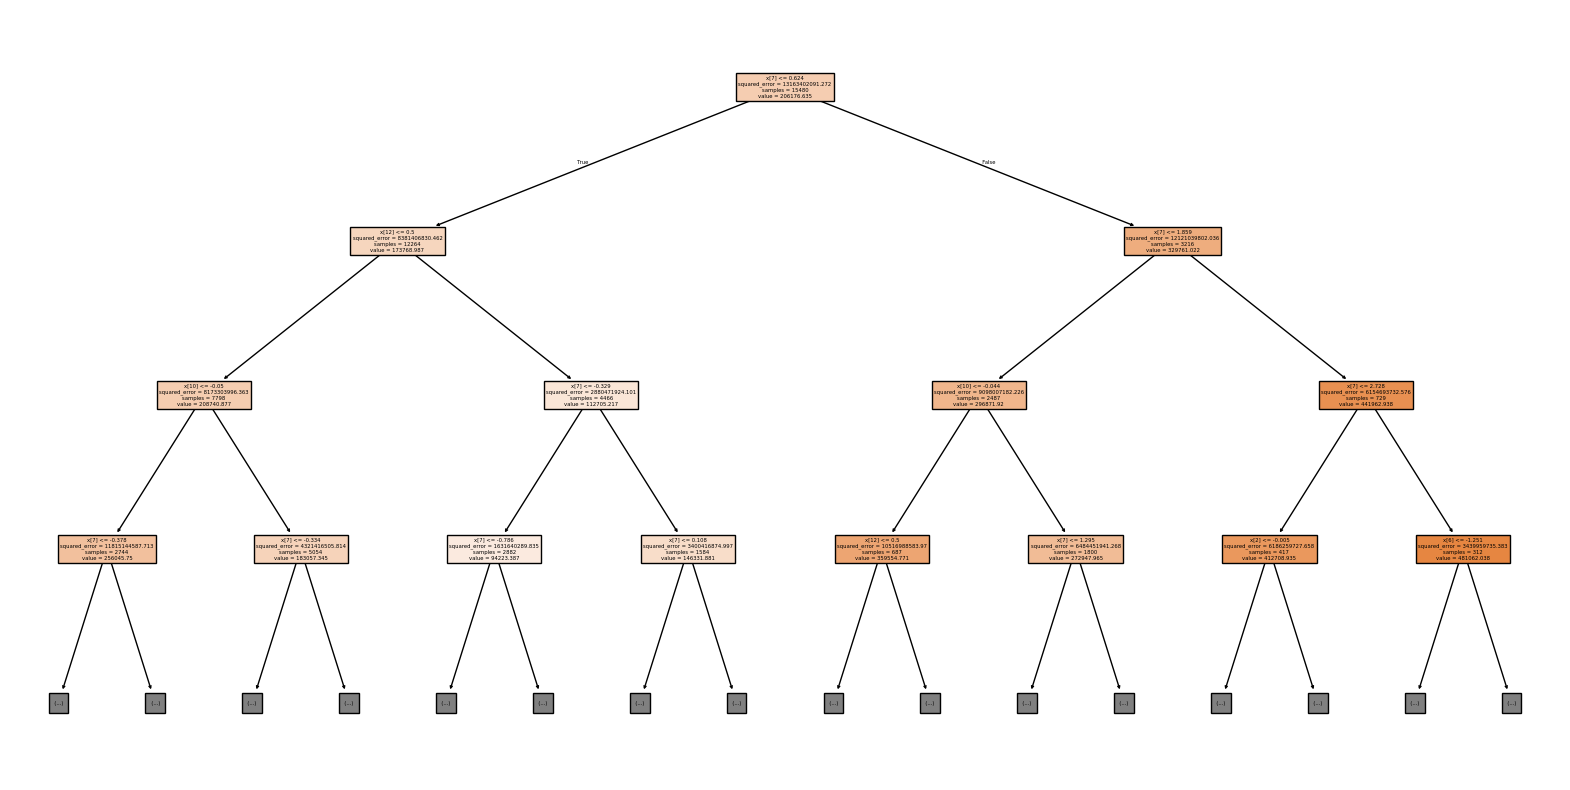

In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, max_depth=3)  # Visualize first 3 levels only
plt.show()


### Cross_Validation
devide data into sets train and validate on each one 

In [67]:
from sklearn.model_selection import cross_val_score
cv1=-cross_val_score(dt_model,X_train_prepared_df,y_train,scoring='neg_root_mean_squared_error',cv=10)
cv1.round(2)

array([72716.49, 66644.3 , 71415.79, 74170.08, 69377.53, 64325.06,
       74075.5 , 69622.28, 70874.01, 69315.5 ])

In [71]:
pd.Series(cv1).describe()

count       10.000000
mean     70253.654291
std       3126.372671
min      64325.058434
25%      69331.006346
50%      70248.149406
75%      72391.311445
max      74170.076000
dtype: float64

##### the error mean is 70253 so bad we  will try randomforest

### RandomForest

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(random_state=42)
cv2=-cross_val_score(rf_model,X_train_prepared_df,y_train,scoring='neg_root_mean_squared_error',cv=10)
cv2.round(2)

array([52436.68, 47518.25, 49496.43, 51348.62, 50219.9 , 48125.33,
       50424.3 , 49269.59, 50413.29, 49393.1 ])

In [75]:
pd.Series(cv2).describe()

count       10.000000
mean     49864.549983
std       1445.328713
min      47518.253186
25%      49300.467434
50%      49858.169843
75%      50421.550455
max      52436.679509
dtype: float64

### Grid Search

In [87]:
from sklearn.model_selection import GridSearchCV
grid_params=[{'max_features':[4,6,8],'n_estimators': [50, 100]}]
gs=GridSearchCV(rf_model,grid_params,cv=3,scoring='neg_root_mean_squared_error')
gs

,estimator,RandomForestR...ndom_state=42)
,param_grid,"[{'max_features': [4, 6, ...], 'n_estimators': [50, 100]}]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [88]:
gs.fit(X_train_prepared_df,y_train)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"[{'max_features': [4, 6, ...], 'n_estimators': [50, 100]}]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [89]:
print('',gs.best_params_)
print(gs.best_estimator_)
print(gs.best_score_)

 {'max_features': 6, 'n_estimators': 100}
RandomForestRegressor(max_features=6, random_state=42)
-49671.52963088819


In [90]:
gs_df=pd.DataFrame(gs.cv_results_)
gs_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.076060,0.062182,0.062285,0.000319,4,50,"{'max_features': 4, 'n_estimators': 50}",-50412.268765,-50928.824684,-49849.732899,-50396.942116,440.670663,6
1,4.262979,0.065485,0.128918,0.003248,4,100,"{'max_features': 4, 'n_estimators': 100}",-50270.426255,-50672.276698,-49525.641055,-50156.114669,475.039422,4
2,3.078166,0.110557,0.068955,0.003288,6,50,"{'max_features': 6, 'n_estimators': 50}",-50078.594809,-50240.904849,-49317.652206,-49879.050621,402.460990,2
3,6.011467,0.254608,0.119596,0.004904,6,100,"{'max_features': 6, 'n_estimators': 100}",-50004.060080,-50097.696290,-48912.832523,-49671.529631,537.840070,1
4,3.642862,0.041606,0.064695,0.004779,8,50,"{'max_features': 8, 'n_estimators': 50}",-50456.545981,-50617.429504,-50030.867421,-50368.280969,247.462864,5
5,7.555637,0.067454,0.119593,0.000557,8,100,"{'max_features': 8, 'n_estimators': 100}",-50028.369709,-50373.449687,-49615.762996,-50005.860797,309.733508,3


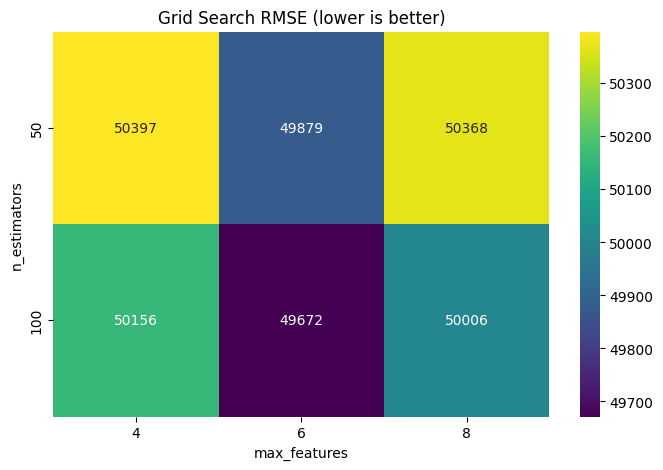

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = gs_df.pivot(index="param_n_estimators", columns="param_max_features", values="mean_test_score")

plt.figure(figsize=(8, 5))
sns.heatmap(-pivot, annot=True, fmt=".0f", cmap="viridis")
plt.title("Grid Search RMSE (lower is better)")
plt.xlabel("max_features")
plt.ylabel("n_estimators")
plt.show()


In [116]:
final_model_to_use=gs.best_estimator_
gs_predictions=final_model_to_use.predict(X_train_prepared_df)
print(mean_squared_error(gs_predictions,y_train))
print(root_mean_squared_error(gs_predictions,y_train))

329765046.9074715
18159.43410207134


In [117]:
final_model_to_use

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,6
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### RandomizedSearch

In [128]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'max_features': randint(2,20),'n_estimators':randint(50,100)}
rs=RandomizedSearchCV(rf_model,param_distribs,scoring='neg_root_mean_squared_error',cv=3,n_iter=10)
rs.fit(X_train_prepared_df,y_train)

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_features': <scipy.stats....001AFE3973D90>, 'n_estimators': <scipy.stats....001AFAB129810>}"
,n_iter,10
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [129]:
final_model = rs.best_estimator_  # includes preprocessing
final_model

,n_estimators,97
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [130]:
rs_predictions=final_model_to_use.predict(X_train_prepared_df)
print(mean_squared_error(rs_predictions,y_train))
print(root_mean_squared_error(rs_predictions,y_train))

329765046.9074715
18159.43410207134


In [131]:
predictionTest=final_model.predict(X_test_prepared_df)
print(root_mean_squared_error(y_test,predictionTest))

48927.669760732904


In [132]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,rs_predictions)
r2_test = r2_score(y_test,predictionTest)
print("train acc :", r2_train)
print("test acc :", r2_test)

train acc : 0.9749483420303539
test acc : 0.8261027263513487


### Model deployment

#### model saving

In [133]:
import joblib 
rndmFrst_rndmSrch_Model=joblib.dump(final_model,'rndmFrst_rndmSrch_Model.pkl')

#### model loading

In [134]:
final_model_reloaded = joblib.load("rndmFrst_rndmSrch_Model.pkl")
final_model_reloaded

,n_estimators,97
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [150]:
y_train.iloc[1000]

np.float64(202800.0)

In [151]:
final_model_reloaded.predict(X_train_prepared_df.iloc[[1000]])

array([183396.90721649])